In [74]:
import os
import pprint
import random
import statistics
import scipy.stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import AtlasScenarios
%matplotlib inline

pp =  pprint.PrettyPrinter(compact=True)

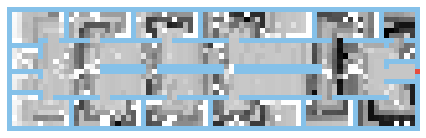

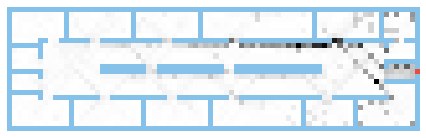

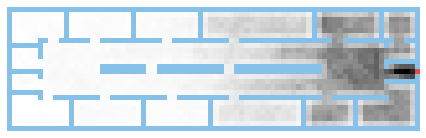

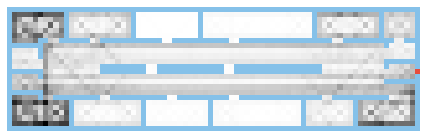

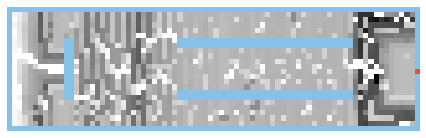

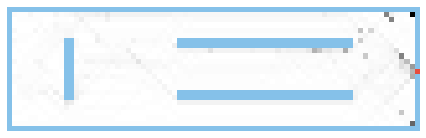

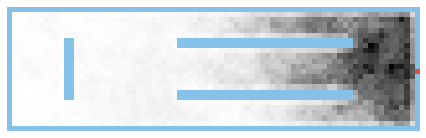

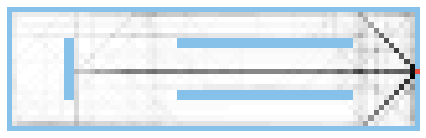

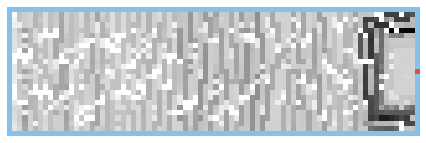

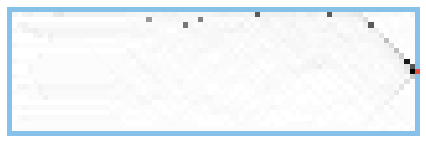

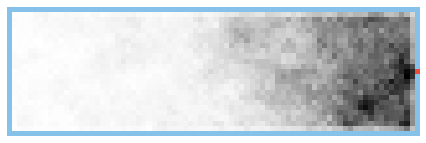

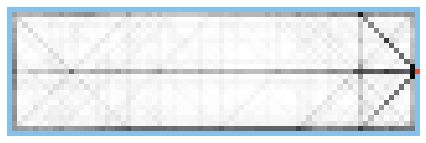

In [79]:
'''
###############################################################################
Heatmap
###############################################################################
'''

#=== gather data

with open('AtlasLog_200428014808.json','r') as f:
    log      = json.loads(f.read())

#=== create plot

for run in log:
    # color cells visited
    data     = np.array(run['heatmap'])
    flat     = data.flatten()
    flat.sort()
    vmax     = flat[-2]
    cmap     = plt.cm.Greys
    norm     = plt.Normalize(0, vmax)
    rgba     = cmap(norm(data))
    
    # color real map
    realMap  = getattr(AtlasScenarios,run['scenarioName'])
    x = 0
    for line in realMap.splitlines():
        if not line.startswith('#'):
            continue
        for (y,c) in enumerate(line):
            if c=='#':
                rgba[x, y, :3] = (133/255,193/255,233/255)
            elif c=='S':
                rgba[x, y, :3] = (231/255, 76/255, 60/255)
        x += 1
    
    (fig,ax) = plt.subplots()
    im       = ax.imshow(rgba, interpolation='nearest')

    fig.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.axis('off')
    fig.savefig(
        os.path.join(
            'plots',
            'heatmap_{0}_{1}.eps'.format(
                run['scenarioName'][len('SCENARIO_'):],
                run['navAlg'][len('Navigation'):],
            ),
        ),
        bbox_inches='tight',
    )
    plt.show()

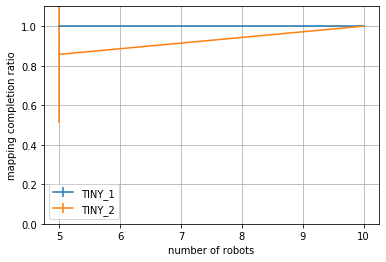

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [80]:
'''
###############################################################################
Completion Ratio
###############################################################################
'''

#=== helper functions

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m, h)

#=== gather data

with open('AtlasLog_200428022117.json','r') as f:
    log = json.loads(f.read())

data     = {}
for run in log:
    scenarioName     = run['scenarioName']
    numRobots        = run['numRobots']
    mappingoutcome   = run['mappingoutcome']
    if scenarioName not in data:
        data[scenarioName]            = {}
    if numRobots not in data[scenarioName]:
        data[scenarioName][numRobots] = []
    if mappingoutcome=='success':
        data[scenarioName][numRobots] += [1]
    else:
        data[scenarioName][numRobots] += [0]

#=== create plot

(fig,ax) = plt.subplots()
lines    = []
for scenario in data.keys():
    x    = []
    y    = []
    yerr = []
    for (k,v) in data[scenario].items():
        x    += [k]
        (m,h) = mean_confidence_interval(v)
        y    += [m]
        yerr += [h]
    lines    += [ax.errorbar(x, y, yerr=yerr,label=scenario[len('SCENARIO_'):])]
ax.grid(True, zorder=5)
plt.xlabel('number of robots')
plt.ylim(0,1.1)
plt.ylabel('mapping completion ratio')
plt.legend(handles=lines)
plt.show()
fig.savefig(os.path.join('plots','completion_ratio.eps'),bbox_inches='tight')

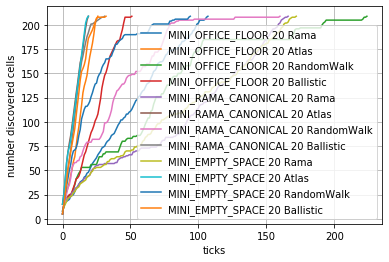

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [83]:
'''
###############################################################################
Mapping Profile
###############################################################################
'''

#=== gather data

with open('AtlasLog_200428180256.json','r') as f:
    log = json.loads(f.read())

#=== gather data

data     = {}
for run in log:
    scenarioName = run['scenarioName'][len('SCENARIO_'):]
    numRobots    = run['numRobots']
    navAlg       = run['navAlg'][len('Navigation'):]
    profile      = run['profile']
    if (scenarioName,numRobots) not in data:
        data[(scenarioName,numRobots)] = {}
    if navAlg not in data[(scenarioName,numRobots)]:
        data[(scenarioName,numRobots)][navAlg] = []
    data[(scenarioName,numRobots)][navAlg] += [profile]

#=== create plot

(fig,ax) = plt.subplots()
lines    = []
for ((scenario,numRobots),v) in data.items():
    #if alg!='RandomWalk':
    #    continue
    for (alg,v) in v.items():
        profile   = v[0] # FIXME
        lines    += [plt.plot(profile,label='{0} {1} {2}'.format(scenario,numRobots,alg))]
ax.grid(True, zorder=5)
ax.legend()
plt.xlabel('ticks')
plt.ylabel('number discovered cells')
plt.show()
fig.savefig(os.path.join('plots','mapping_profile.eps'),bbox_inches='tight')